# Expolratory Data Analysis

### Develop a model to predict if client will subscribe to direct marketing campaign for a banking institution.
***
** Load the data and do some initial exploration **
- The data is not comma (",") seperated but semi-colon (";") seperated. Hence we use sep=";" while loading it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv("./bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Initial Exploration
***
In this stage we'll get an high level overview of what our dataset contains


***
### Number of rows (samples) and columns (features) in the dataset 

In [2]:
df.shape

(41188, 21)

***
### Analyzing the data types of each feature

In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

***
### Getting a sort of a summary of the numerical features

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


***
### Extracting names of numerical and categorical features

In [5]:
# Numerical Features
numerical_features = list(df._get_numeric_data().columns)
print("Numerical Features =>")
numerical_features

Numerical Features =>


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [6]:
# Categorical Features
categorical_features = list(set(df.columns) - set(numerical_features))
print("\nCategorical Features =>")
categorical_features


Categorical Features =>


['day_of_week',
 'poutcome',
 'month',
 'contact',
 'default',
 'y',
 'loan',
 'job',
 'education',
 'marital',
 'housing']

***
### Distplots for numeric features
* It'll help us understand the distribution of these features

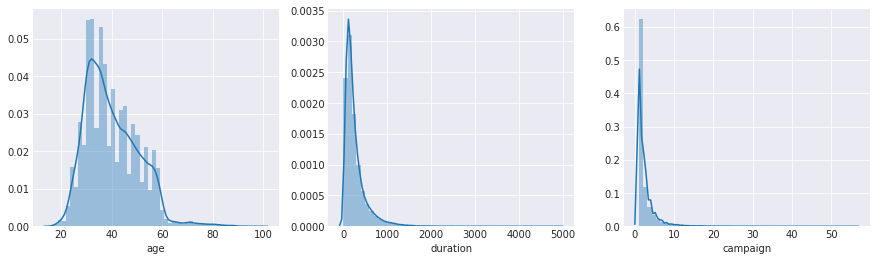

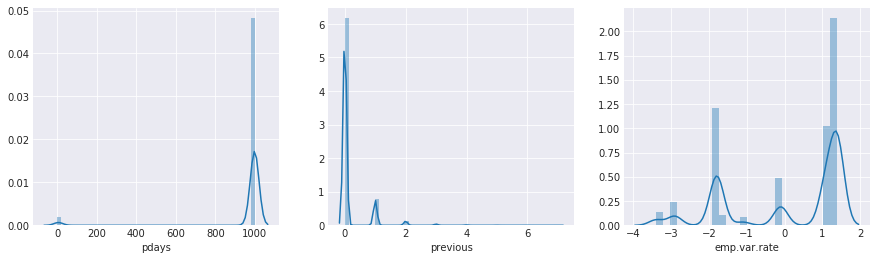

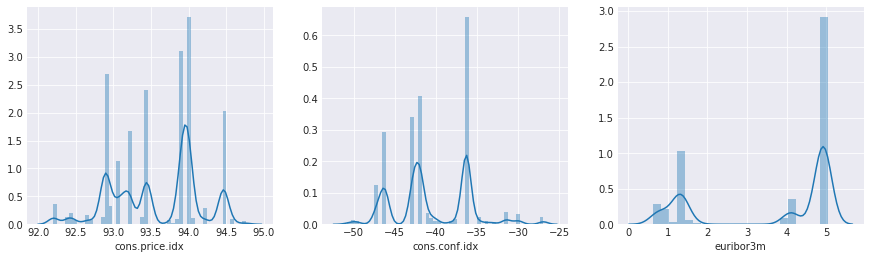

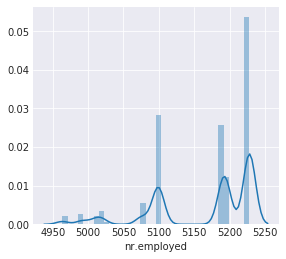

In [7]:
# Plots distplots for all the numeric features
for idx, feature in enumerate(numerical_features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        sns.distplot(df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        sns.distplot(df[feature])
    else:
        plt.subplot("133")
        sns.distplot(df[feature])


***
### Count Plot for categorical features
- Since distplot can only accept numeric values, we can use count plots to visualize the distribution of categorical features

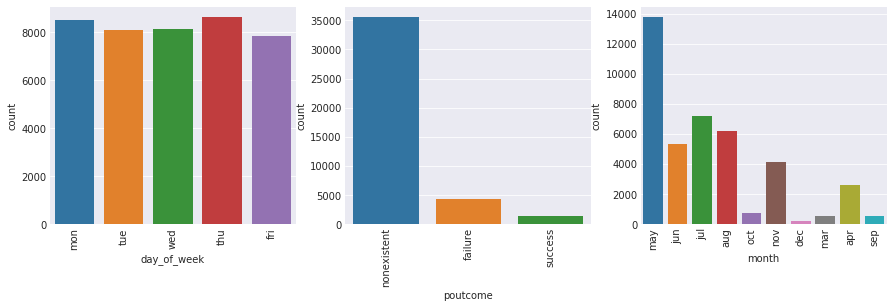

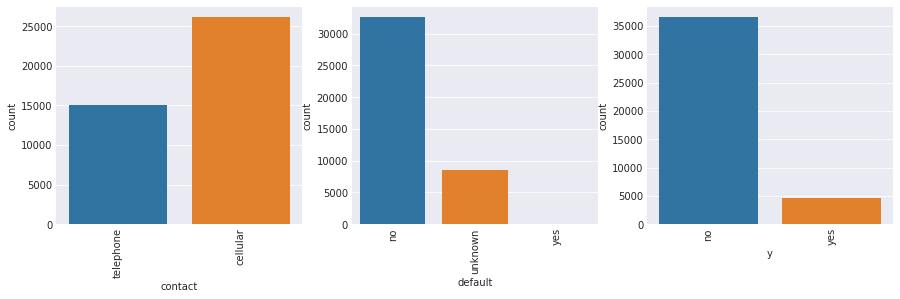

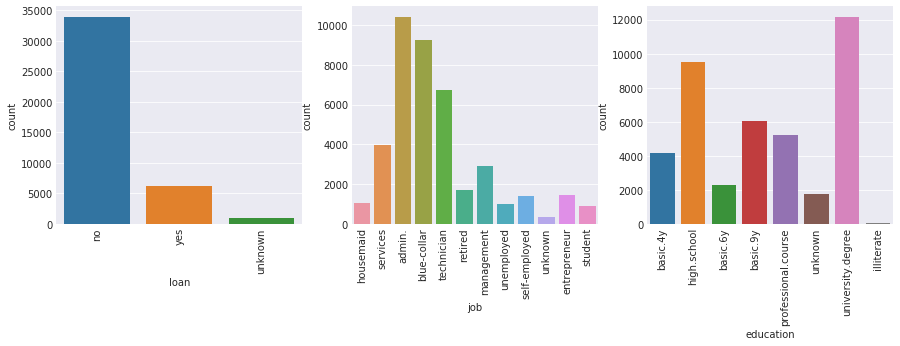

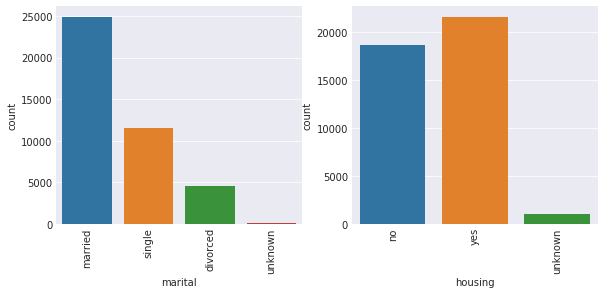

In [8]:
# Plots count plots for all the categorical features
for idx, feature in enumerate(categorical_features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        plt.xticks(rotation='vertical')
        sns.countplot(df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        plt.xticks(rotation='vertical')
        sns.countplot(df[feature])
    else:
        plt.subplot("133")
        plt.xticks(rotation='vertical')
        sns.countplot(df[feature])

- From the above count plots, it can be seen that a lot of the categorical features have a category called "unknown"
- This is equivalent to missing data for this particular dataset
- We'll need to impute (fill in) this missing data before we proceed.

***
** Lets check if our numerical data contains any null values **

In [9]:
df[numerical_features].isnull().sum(axis=0)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

There are no null values in our numerical data

***
** Let's replace the "unkown" values in our categorical data with the most frequent category for that column **

In [10]:
# Make a copy of the original data frame
cleaned_df = df.copy()

In [11]:
# Find the category with highest frequency in a feature and replace "unkown" with that category
for feature in categorical_features:
    count = cleaned_df[feature].value_counts()
    mostFrequentKey = count.index[0]
    for idx in count.index:
        if count[idx] > count[mostFrequentKey]:
            mostFrequentKey = idx
    cleaned_df.loc[cleaned_df[feature] == "unknown", feature] = mostFrequentKey

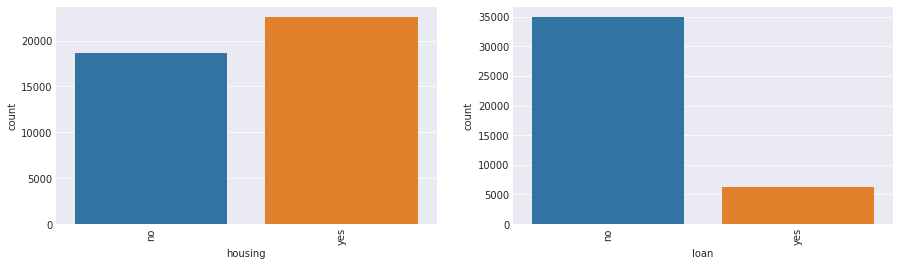

In [12]:
plt.figure(figsize=(15,4))
plt.subplot("121")
plt.xticks(rotation='vertical')
sns.countplot(cleaned_df["housing"])

plt.subplot("122")
plt.xticks(rotation='vertical')
sns.countplot(cleaned_df["loan"])

There are no more "unknown" values in our data set.

***
** Now, we have quite a few categorical features. But the problem is that most of the models cannot properly deal with non-numeric values. So we need to somehow encode these values and convert them into numbers. **

In [13]:
from sklearn.preprocessing import LabelEncoder

# We use Label Encoding to convert categorical features to numeric
columnsToEncode = list(cleaned_df.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        cleaned_df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)

In [14]:
cleaned_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


** Let's observe the correlation between all of the features **

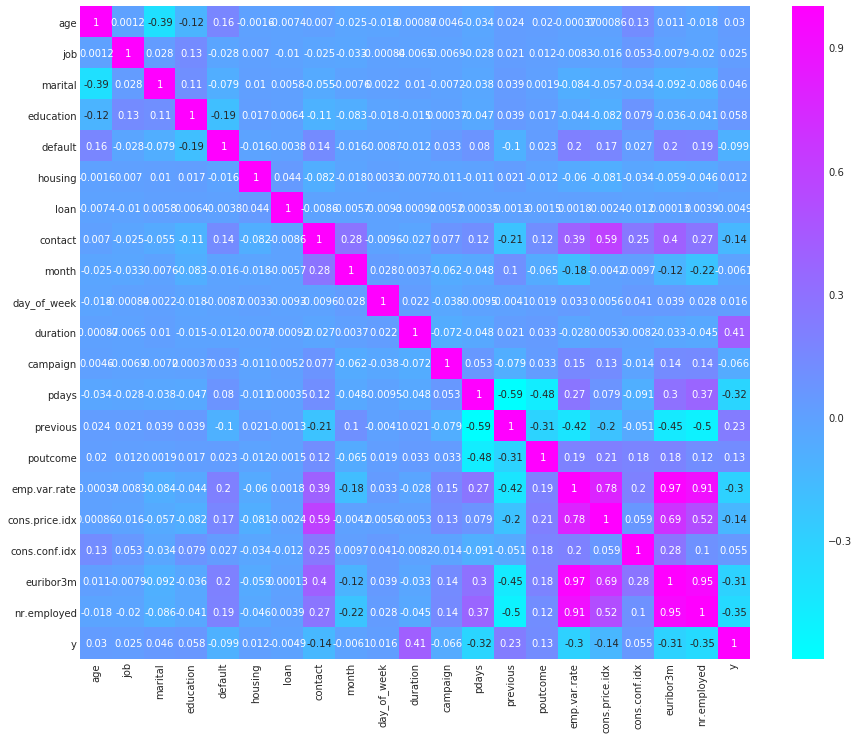

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='cool')

It seems that some of the features have a sizeable correlation on our target feature "y".

***
** We now scale the numeric features as scaled data gives better results with certain models **

In [16]:
from sklearn import preprocessing

cleaned_df[numerical_features] = preprocessing.scale(cleaned_df[numerical_features])

***
### Time for Predictions!
- We first create a generalized function that takes data and the classifier as the input
- The function then splits the dataset into training and testing data and then measures performance of the classifier with this data
- We will then use this function to analyze performance of various different models.

In [18]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
def measure_performance(df, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=33)
    clf = clf.fit(X_train,y_train)
    
    y_pred=clf.predict(X_test)
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y_test,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y_test,y_pred),"\n")

***
### Using Decision Tree Classifier

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,min_samples_leaf=5)
measure_performance(cleaned_df, clf)

Accuracy:0.914 

Classification report
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      9132
          1       0.64      0.55      0.59      1165

avg / total       0.91      0.91      0.91     10297
 

Confusion matrix
[[8769  363]
 [ 519  646]] 



***
### Using Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(tree.DecisionTreeClassifier(random_state=9),
                               n_estimators=500,
                               max_samples=100,
                               bootstrap=True,
                               random_state=9)
measure_performance(cleaned_df, bagging_clf)

Accuracy:0.910 

Classification report
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      9132
          1       0.67      0.41      0.51      1165

avg / total       0.90      0.91      0.90     10297
 

Confusion matrix
[[8891  241]
 [ 685  480]] 



***
### Using Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
measure_performance(cleaned_df, rf_clf)

Accuracy:0.916 

Classification report
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      9132
          1       0.66      0.51      0.58      1165

avg / total       0.91      0.92      0.91     10297
 

Confusion matrix
[[8830  302]
 [ 567  598]] 



***
### Using AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100)
measure_performance(cleaned_df, ada_clf)

Accuracy:0.909 

Classification report
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      9132
          1       0.66      0.41      0.50      1165

avg / total       0.90      0.91      0.90     10297
 

Confusion matrix
[[8883  249]
 [ 689  476]] 

